In [1]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
import tensorflow as tf

In [2]:
from tensorflow.keras.preprocessing.image import load_img, img_to_array

In [4]:
# load the model
model = tf.keras.models.load_model('./models/trained_object_detection.h5')


In [5]:
image = load_img('./images/N207.jpeg')
image = np.array(image, dtype=np.uint8)
image1 = load_img('./images/N207.jpeg', target_size=(224, 224))
image_arr = img_to_array(image1)/255.0 # convert into array and normalize the output


In [7]:
# size of array
h, w, d = image.shape
print('Height', h)
print("Width", w)

Height 423
Width 541


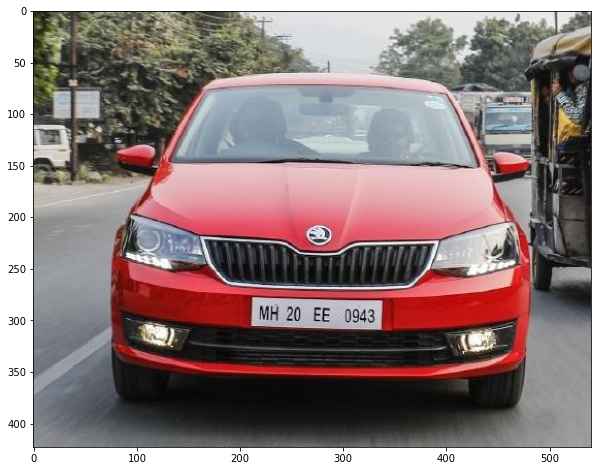

In [9]:
plt.figure(figsize=(10, 15))
plt.imshow(image)
plt.show()

In [12]:
test_arr = image_arr.reshape(1, 224, 224, 3)
test_arr.shape

(1, 224, 224, 3)

In [20]:
# predictions
coords = model.predict(test_arr)
coords

1/1 [==============================] - 0s 228ms/step


array([[0.3965609 , 0.625984  , 0.65641147, 0.7330773 ]], dtype=float32)

In [21]:
# denormalize the values
denorm = np.array([w, w, h, h])
coords = coords * denorm
coords

array([[214.53945088, 338.65735108, 277.66205138, 310.09169269]])

In [22]:
coords = coords.astype(np.int32)
coords

array([[214, 338, 277, 310]], dtype=int32)

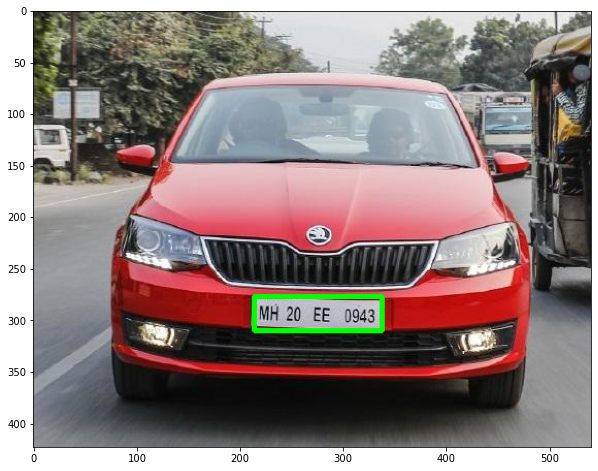

In [25]:
# draw bounding rectangle
xmin, xmax, ymin, ymax = coords[0]
pt1 = (xmin, ymin)
pt2 = (xmax, ymax)
cv2.rectangle(image, pt1, pt2, (0, 255, 2), 3)
plt.figure(figsize=(10, 15))
plt.imshow(image)
plt.show()

In [27]:
# create pipeline

SyntaxError: invalid syntax (169169763.py, line 2)

In [32]:
# %load 
# load the model
path = './images/N205.jpeg'
def object_detection(path):
    image = load_img(path)
    image = np.array(image, dtype=np.uint8)
    image1 = load_img(path, target_size=(224, 224))
    image_arr = img_to_array(image1)/255.0 # convert into array and normalize the output
    # size of array
    h, w, d = image.shape
    test_arr = image_arr.reshape(1, 224, 224, 3)
    # predictions
    coords = model.predict(test_arr)
    denorm = np.array([w, w, h, h])
    coords = coords * denorm
    coords = coords.astype(np.int32)
    # draw bounding rectangle
    xmin, xmax, ymin, ymax = coords[0]
    pt1 = (xmin, ymin)
    pt2 = (xmax, ymax)
    cv2.rectangle(image, pt1, pt2, (0, 255, 2), 3)
    return image, coords



In [38]:
path = './images/Cars2.jpeg'

image, cods = object_detection(path)
plt.figure(figsize=(10, 15))
plt.imshow(image)
plt.show()

FileNotFoundError: [Errno 2] No such file or directory: './images/Cars2.jpeg'